# Part 03 지도학습 기법 1

## K-NN

In [1]:
import numpy as np
import pandas as pd
import operator
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def create_data_set():
    group = np.array(
        [[1., 1.1],
         [1., 1.], 
         [0., 0.],
         [0., 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

In [3]:
group, labels = create_data_set()

In [4]:
group

array([[1. , 1.1],
       [1. , 1. ],
       [0. , 0. ],
       [0. , 0.1]])

In [5]:
labels

['A', 'A', 'B', 'B']

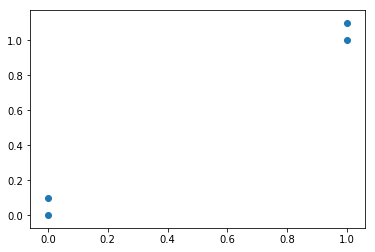

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(group[:, 0], group[:, 1])
plt.show()

In [7]:
def classify0(inX, data, labels, k):
    data_size = data.shape[0]
    diffmat = np.tile(inX, (data_size, 1)) - data
    sq_diffmat = diffmat ** 2
    sq_distance = sq_diffmat.sum(axis=1)
    distance = sq_distance ** .5
    sorted_dist_indicies = distance.argsort()
    class_count = {}
    for i in range(k):
        votellabel = labels[sorted_dist_indicies[i]]
        class_count[votellabel] = class_count.get(votellabel, 0) + 1
    sorted_class_count = sorted(class_count.items(), key=operator.itemgetter(1), reverse=True)
    return sorted_class_count[0][0]

In [8]:
sorted_class_count = classify0([0,0], group, labels, 3)
sorted_class_count

'B'

In [10]:
sorted_class_count

'B'

In [11]:
class_count = {}
for i in [2,3,1,0]:
    a = labels[i]
    class_count[a] = class_count.get(a, 0) + 1

In [12]:
class_count

{'B': 2, 'A': 2}

In [13]:
class_count.items()

dict_items([('B', 2), ('A', 2)])

In [14]:
sorted(class_count.items(), key=operator.itemgetter(1), reverse=True)

[('B', 2), ('A', 2)]

In [15]:
import sys
sys.path.insert(0, "C:\workspace\KSA\data\Python_Data\ch03_data")

In [16]:
def file2matrix(filname):
    love_dict = {'largeDoses':3, 'smallDoses':2, 'didntLike':1}
    fr = open(filname)
    array0lines = fr.readlines()
    number0flines = len(array0lines)
    return_mat = np.zeros((number0flines, 3))
    class_label = []
    index = 0
    for line in array0lines:
        line = line.strip()
        list_from_line = line.split('\t')
        return_mat[index, :] = list_from_line[0 : 3]
        if list_from_line[-1].isdigit():
            class_label.append(int(list_from_line[-1]))
        else:
            class_label.append(love_dict.get(list_from_line[-1]))
        index += 1
    return return_mat, class_label

In [17]:
ep = sys.float_info.epsilon
np.all(df[df.columns[:-1]].values - df2 < ep*10)

NameError: name 'df' is not defined

In [18]:
# csv read
df = pd.read_csv('C:\workspace\KSA\data\Python_Data\ch03_data/datingtestset.csv', header=0)
train = df[df.columns[:-1]].applymap(lambda x : round(x, 7)).values
train_label = df[df.columns[-1]].replace({'largeDoses':3, 'smallDoses':2, 'didntLike':1}).values

# function read
df2, class_label = file2matrix('C:\workspace\KSA\data\Python_Data\ch03_data/datingtestset.txt')

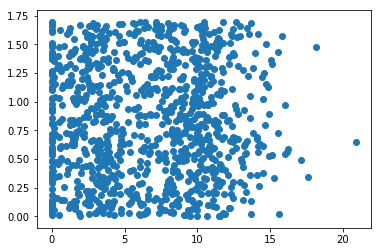

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(train[:, 1], train[:, 2])
plt.show()

In [20]:
def auto_norm(df):
    min_val = df.min(0)
    max_val = df.max(0)
    ranges = max_val - min_val
    norm_df = np.zeros(np.shape(df))
    m = df.shape[0]
    norm_df = df - np.tile(min_val, (m, 1))
    norm_df = norm_df / np.tile(ranges, (m, 1))
    return norm_df, ranges, min_val

In [21]:
norm_df, ranges, min_val = auto_norm(train)

In [22]:
norm_df

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])

In [23]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
minmax.fit(train)
norm_train = minmax.transform(train)
norm_train

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])

In [24]:
norm_train.shape

(1000, 3)

In [25]:
def dating_class_test(train, train_label, hold_out_ratio=.1):
    norm_df, ranges, min_val = auto_norm(train)
    m = norm_df.shape[0]
    num_test = int(m * hold_out_ratio)
    error_count = .0
    for i in range(num_test):
        res = classify0(norm_df[i, :], norm_df[num_test:m, :], train_label[num_test:m], 3)
        print('classifier came back with : {}, the real answer is : {}'.format(res, train_label[i]))
        if res != train_label[i]:
            error_count += 1.
    print('ToT Error rate is : {}'.format(error_count / float(num_test)))
    print('Error Count : {}'.format(error_count))

In [26]:
dating_class_test(train, train_label, .5)

classifier came back with : 3, the real answer is : 3
classifier came back with : 2, the real answer is : 2
classifier came back with : 1, the real answer is : 1
classifier came back with : 1, the real answer is : 1
classifier came back with : 1, the real answer is : 1
classifier came back with : 1, the real answer is : 1
classifier came back with : 3, the real answer is : 3
classifier came back with : 3, the real answer is : 3
classifier came back with : 1, the real answer is : 1
classifier came back with : 3, the real answer is : 3
classifier came back with : 1, the real answer is : 1
classifier came back with : 1, the real answer is : 1
classifier came back with : 2, the real answer is : 2
classifier came back with : 1, the real answer is : 1
classifier came back with : 1, the real answer is : 1
classifier came back with : 1, the real answer is : 1
classifier came back with : 1, the real answer is : 1
classifier came back with : 1, the real answer is : 1
classifier came back with : 

## Decision Tree
- https://yamalab.tistory.com/31
- https://scikit-learn.org/stable/modules/tree.html

In [27]:
from math import log

In [28]:
def create_dt_dataset():
    df = np.array(
        [[1, 1, 'yes'],
         [1, 1, 'yes'],
         [1, 0, 'no'],
         [0, 1, 'no'],
         [0, 1, 'no']]
        )
    labels = ['no surfacing', 'flippers']
    return df, labels

In [29]:
def calc_entrophy(df):
    num_entries = len(df)
    label_count = {}
    for feat_vec in df:
        current_label = feat_vec[-1]
        label_count[current_label] = label_count.get(current_label, 0) + 1
    ent = 0.
    for label, counts in label_count.items():
        prob = float(counts) / num_entries
        ent -= prob * log(prob, 2)
    return ent

In [30]:
calc_entrophy(df[-2:])

2.0

In [31]:
df, labels = create_dt_dataset()
calc_entrophy(df)

0.9709505944546686

In [32]:
df[:,2] = np.where(df[:,2] == 'yes', 1, 0)

In [33]:
df = df.astype(np.float64)

In [34]:
calc_entrophy(df)

0.9709505944546686

In [35]:
def split_dataset(df, value, col_ind=0):
    bool_ind = np.where(df[:, col_ind] == value)[0]
    return np.hstack((df[:,:col_ind], df[:,col_ind+1:]))[bool_ind]

In [36]:
split_dataset(df, 1, col_ind=1)

array([[1., 1.],
       [1., 1.],
       [0., 0.],
       [0., 0.]])

In [37]:
np.unique(df[:, 0])

array([0., 1.])

In [38]:
def choose_best_feature_to_split(df):
    num_feature = df.shape[1] - 1
    base_entrophy = calc_entrophy(df)
    best_info_gain, best_feature = 0., -1
    store = {}
    for i in range(num_feature):
        feat_li = df[:, i]
        unique_val = np.unique(feat_li)
        new_entrophy = 0.
        for value in unique_val:
            sub_df = split_dataset(df, value, col_ind = i)
            prob = sub_df.shape[0] / df.shape[0]
            new_entrophy += prob * calc_entrophy(sub_df)
        
        info_gain = base_entrophy - new_entrophy
        if info_gain > best_info_gain:
            best_info_gain = info_gain
            best_feature = i
    return best_feature

In [39]:
choose_best_feature_to_split(df)

0

In [40]:
from collections import Counter

# def majority_cnt(class_list):
#     class_count = {}
#     for vote in class_list:
#         if vote not in class_count.keys():
#             class_count[vote] = 0
#         class_count[vote] += 1
#     sorted_class_count = sorted(class_count.items(), key=operator.itemgetter(1), reverse=True)
#     return sorted_class_count

def majority_cnt(class_list):
    return sorted(Counter(df[:, -1]).items(), key=operator.itemgetter(1), reverse=True)

In [41]:
def split_dataset2(df, value, col_ind=0):
    retDataSet = []
    for featVec in df:
        if featVec[col_ind] == value:
            reducedFeatVec = featVec[:col_ind]
            reducedFeatVec.extend(featVec[col_ind+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet

def majority_cnt2(class_list):
    class_count = {}
    for vote in class_list:
        if vote not in class_count.keys():
            class_count[vote] = 0
        class_count[vote] += 1
    sorted_class_count = sorted(class_count.items(), key=operator.itemgetter(1), reverse=True)
    return sorted_class_count

def choose_best_feature_to_split2(df):
    num_feature = len(df[0]) - 1
    base_entrophy = calc_entrophy(df)
    best_info_gain, best_feature = 0., -1
    for i in range(num_feature):
        feat_li = [example[i] for example in df]
        unique_val = set(feat_li)
        new_entrophy = 0.
        for value in unique_val:
            sub_df = split_dataset2(df, value, col_ind = i)
            prob = len(sub_df) / float(len(df))
            new_entrophy += prob * calc_entrophy(sub_df)
        info_gain = base_entrophy - new_entrophy
        if info_gain > best_info_gain:
            best_info_gain = info_gain
            best_feature = i
    return best_feature

def create_tree2(df, labels):
    classList = [example[-1] for example in df]
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    if len(df[0]) == 1:
        return majority_cnt(classList)
    bestFeat = choose_best_feature_to_split2(df)
    bestFeatLabel = labels[bestFeat]
    my_tree = {bestFeatLabel : {}}
    del labels[bestFeat]
    featValue = [example[bestFeat] for example in df]
    uniqueVals = set(featValue)
    for value in uniqueVals:
        sublabels = labels[:]
        my_tree[bestFeatLabel][value] = create_tree2(
            split_dataset2(df, value, col_ind=bestFeat), sublabels)
    return my_tree

In [42]:
df = [
    [1, 1, 'yes'],
    [1, 1, 'yes'],
    [1, 0, 'no'],
    [0, 1, 'no'],
    [0, 1, 'no']
]
labels = ['no surfacing', 'flippers']

In [43]:
create_tree2(df, labels)

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [44]:
def retrieve_tree(i):
    tree_li = [
        {'no surfacing' : {0 : 'no', 1 : {'flippers' : {0 : 'no', 1 : 'yes'}}}},
        {'no surfacing' : {0 : 'no', 1 : {'flippers' : {0 : {'head' : {0 : 'no', 1 : 'yes'}}, 1 : 'no'}}}}
    ]
    return tree_li[i]

In [45]:
df, labels = create_dt_dataset()
labels

['no surfacing', 'flippers']

In [46]:
def classify(input_tree, feat_labels, test_vec):
    first_str = list(input_tree)[0]
    second_dict = input_tree[first_str]
    feat_ind = feat_labels.index(first_str)
    key = test_vec[feat_ind]
    feat_val = second_dict[key]
    if isinstance(feat_val, dict):
        classlabel = classify(feat_val, feat_labels, test_vec)
    else:
        classlabel = feat_val
    return classlabel

In [47]:
my_tree = retrieve_tree(0)
my_tree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [48]:
classify(my_tree, labels, [1, 0])

'no'

In [49]:
classify(my_tree, labels, [1, 1])

'yes'

## Linear Regression

In [50]:
np.random.seed(seed=1) # 난수를 고정
X_min = 4
X_max = 30
X_n = 16
X = 5 + 25 * np.random.rand(X_n)
prm_c = [170, 108, .2]
T = prm_c[0] - prm_c[1] * np.exp(-prm_c[2] * X)\
    + 4 * np.random.randn(X_n)
np.savez('ch5_data.npz', X=X, X_min=X_min, X_max=X_max, X_n=X_n, T = T)
print(np.round(X, 2))
print(np.round(T, 2))

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]
[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


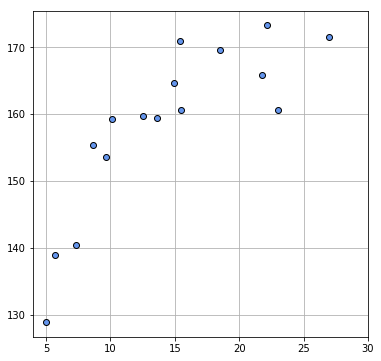

In [51]:
plt.figure(figsize=(6,6))
plt.plot(X, T, marker='o', ls='None',
        markeredgecolor='k', color='cornflowerblue')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

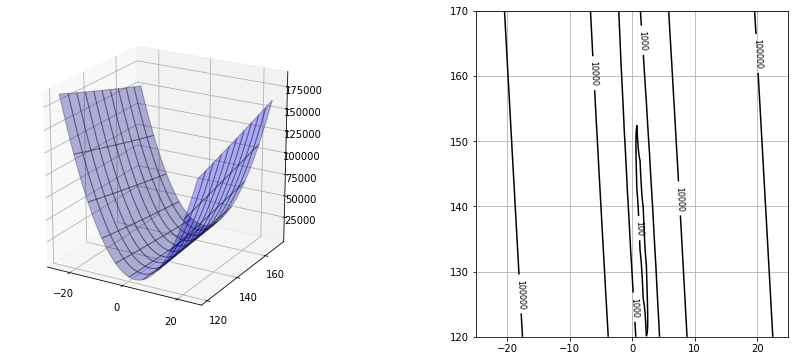

In [52]:
from mpl_toolkits.mplot3d import Axes3D

# 평균 오차 함수 ------------------------------
def mse_line(x, t, w):
    y = w[0] * x + w[1]
    mse = np.mean((y - t) ** 2)
    return mse

# 계산 ----------------------------------------
xn = 100 # 등고선 표시 해상도
w0_range = [-25, 25]
w1_range = [120, 170]
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
j = np.zeros((len(x0), len(x1)))
for i0 in range(xn):
    for i1 in range(xn):
        j[i1, i0] = mse_line(X, T, (x0[i0], x1[i1]))

# 표시 ----------------------------------------
plt.figure(figsize=(14, 6))
plt.subplots_adjust(wspace=.5)

ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(xx0, xx1, j, rstride=10, cstride=10, alpha=.3,
               color='blue', edgecolor='k')
ax.set_xticks([-20, 0, 20])
ax.set_yticks([120, 140, 160])
ax.view_init(20, -60)

plt.subplot(1, 2, 2)
cont = plt.contour(xx0, xx1, j, 30, colors='k',
                  levels=[1e2, 1e3, 1e4, 1e5])
cont.clabel(fmt='%1.0f', fontsize=8)

plt.grid(True)
plt.show()

[5046.3  301.8]
반복 횟수 13820
W=[-0.005794, 0.099991]
MSE=49.027452


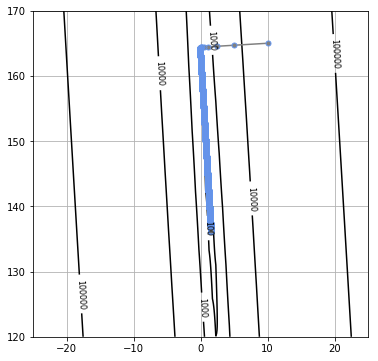

In [53]:
# 평균 제곱 오차의 기울기 ---------------------
def dmse_line(x, t, w):
    y = w[0] * x + w[1]
    d_w0 = 2 * np.mean((y - t) * x)
    d_w1 = 2 * np.mean(y - t)
    return d_w0, d_w1

d_w = dmse_line(X, T, [10, 165])
print(np.round(d_w, 1))

# 경사 하강법 ---------------------------------
def fit_line_num(x, t):
    w_init = [10., 165.]
    alpha = .001
    i_max = int(1e6)
    eps = .1
    w_i = np.zeros([i_max, 2])
    w_i[0, :] = w_init
    for i in range(1, i_max):
        dmse = dmse_line(x, t, w_i[i - 1])
        w_i[i, 0] = w_i[i - 1, 0] - alpha * dmse[0]
        w_i[i, 1] = w_i[i - 1, 1] - alpha * dmse[1]
        if max(np.abs(dmse)) < eps:
            break
    w0 = w_i[i, 0]
    w1 = w_i[i, 1]
    w_i = w_i[:i, :]
    return w0, w1, dmse, w_i

# 메인 ----------------------------------------
plt.figure(figsize=(6,6))
xn = 100 # 등고선 표시 해상도
w0_range = [-25, 25]
w1_range = [120, 170]
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
j = np.zeros((len(x0), len(x1)))
for i0 in range(xn):
    for i1 in range(xn):
        j[i1, i0] = mse_line(X, T, (x0[i0], x1[i1]))
cont = plt.contour(xx0, xx1, j, 30, colors='k',
                  levels=[1e2, 1e3, 1e4, 1e5])
cont.clabel(fmt='%1.0f', fontsize=8)
plt.grid(True)
# 경사 하강법 호출
W0, W1, dMSE, W_history = fit_line_num(X, T)
# 결과 보기
print('반복 횟수 {0}'.format(W_history.shape[0]))
print('W=[{0:.6f}, {1:.6f}]'.format(dMSE[0], dMSE[1]))
print('MSE={0:.6f}'.format(mse_line(X, T, [W0, W1])))
plt.plot(W_history[:, 0], W_history[:, 1], '.-',
         color='gray', ms=10, markeredgecolor='cornflowerblue')
plt.show()

w0=1.540, w1=136.176
SD=7.002 cm


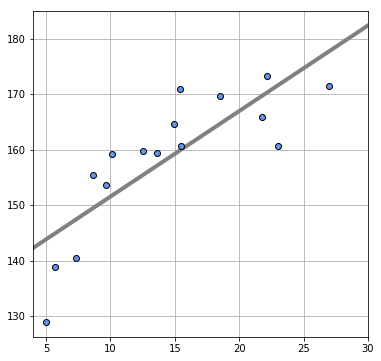

In [54]:
# 선 표시 -------------------------------------
def show_line(w):
    xb = np.linspace(X_min, X_max, 100)
    y = w[0] * xb + w[1]
    plt.plot(xb, y, color=(.5, .5, .5), lw=4)

# 메인 ----------------------------------------
plt.figure(figsize=(6,6))
W = np.array([W0, W1])
mse = mse_line(X, T, W)
print('w0={0:.3f}, w1={1:.3f}'.format(W0, W1))
print('SD={0:.3f} cm'.format(np.sqrt(mse)))
show_line(W)
plt.plot(X, T, marker='o', ls='None',
         color='cornflowerblue', markeredgecolor='k')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

>### Plot에 한글 적용

In [55]:
import matplotlib as mpl
import matplotlib.font_manager as fm
print('버전 :', mpl.__version__)
print('설치 위치 :', mpl.__file__)
print('설정 위치 :', mpl.get_configdir())
print('캐시 위치 :', mpl.get_cachedir())
print('설정 파일 위치 :', mpl.matplotlib_fname())

버전 : 3.0.2
설치 위치 : c:\users\affinity\.conda\envs\ds\lib\site-packages\matplotlib\__init__.py
설정 위치 : C:\Users\Affinity\.matplotlib
캐시 위치 : C:\Users\Affinity\.matplotlib
설정 파일 위치 : c:\users\affinity\.conda\envs\ds\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [56]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체 개수
print(len(font_list))

958


In [57]:
font_list[:15]
f = [f.name for f in fm.fontManager.ttflist]
print(len(font_list))
# 10개의 폰트 명만 출력
f[20:30]

958


['STIXNonUnicode',
 'DejaVu Serif',
 'STIXGeneral',
 'cmr10',
 'cmtt10',
 'DejaVu Serif Display',
 'STIXNonUnicode',
 'STIXSizeFiveSym',
 'DejaVu Sans',
 'DejaVu Serif']

In [58]:
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Gothic' in f.name]

[('Franklin Gothic Book', 'C:\\Windows\\Fonts\\FRABKIT.TTF'),
 ('Franklin Gothic Medium Cond', 'C:\\WINDOWS\\Fonts\\FRAMDCN.TTF'),
 ('Century Gothic', 'C:\\WINDOWS\\Fonts\\GOTHIC.TTF'),
 ('Century Gothic', 'C:\\Windows\\Fonts\\GOTHICI.TTF'),
 ('Franklin Gothic Demi', 'C:\\WINDOWS\\Fonts\\FRADM.TTF'),
 ('Century Gothic', 'C:\\WINDOWS\\Fonts\\GOTHICBI.TTF'),
 ('Franklin Gothic Heavy', 'C:\\Windows\\Fonts\\FRAHV.TTF'),
 ('HYGothic-Medium', 'C:\\Windows\\Fonts\\H2GTRM.TTF'),
 ('Century Gothic', 'C:\\WINDOWS\\Fonts\\GOTHICB.TTF'),
 ('Franklin Gothic Medium', 'C:\\Windows\\Fonts\\framdit.ttf'),
 ('AlternateGothic2 BT', 'C:\\Windows\\Fonts\\Alternate Gothic No2 BT.ttf'),
 ('HYGothic-Extra', 'C:\\Windows\\Fonts\\H2GTRE.TTF'),
 ('Franklin Gothic Book', 'C:\\Windows\\Fonts\\FRABK.TTF'),
 ('Copperplate Gothic Bold', 'C:\\WINDOWS\\Fonts\\COPRGTB.TTF'),
 ('Franklin Gothic Medium', 'C:\\WINDOWS\\Fonts\\framd.ttf'),
 ('Malgun Gothic', 'C:\\WINDOWS\\Fonts\\malgunsl.ttf'),
 ('Malgun Gothic', 'C:\\Windo

In [59]:
path = 'C:\\WINDOWS\\Fonts\\malgunsl.ttf'
fontprop = fm.FontProperties(fname=path, size=10)

## SVM

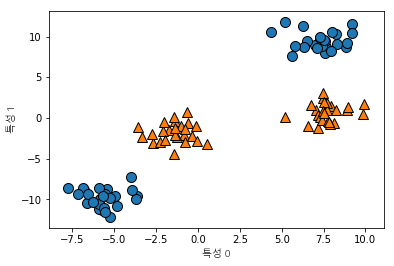

In [60]:
from IPython.display import display
import mglearn
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=4, random_state=8)
y = y % 2
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('특성 0', fontproperties=fontprop)
plt.ylabel('특성 1', fontproperties=fontprop)
plt.show()

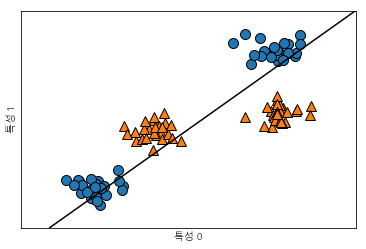

In [61]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC(max_iter=20000)
linear_svm.fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('특성 0', fontproperties=fontprop)
plt.ylabel('특성 1', fontproperties=fontprop)
plt.show()

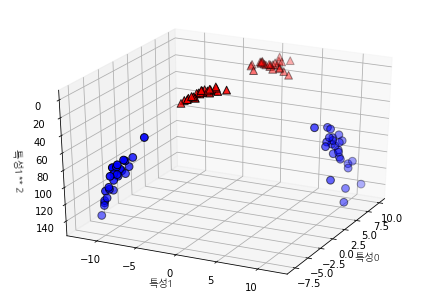

In [62]:
# 두 번째 특성을 제곱하여 추가
X_new = np.hstack([X, (X[:,1] ** 2).reshape(-1, 1)])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3차원 그ㅐㄹ프
ax = Axes3D(figure, elev=-152, azim=-26)

# y == 0인 포인트를 먼저 그리고 그 다음 y == 1인 포인트를 그리자
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
          cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
          cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel('특성0', fontproperties=fontprop)
ax.set_ylabel('특성1', fontproperties=fontprop)
ax.set_zlabel('특성1 ** 2', fontproperties=fontprop)
plt.show()

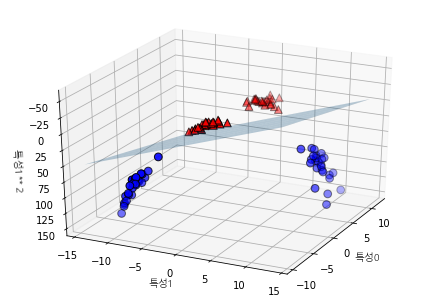

In [63]:
linear_svm_3d = LinearSVC(max_iter=20000)
linear_svm_3d.fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# 선형 결정 경계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
          cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
          cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel('특성0', fontproperties=fontprop)
ax.set_ylabel('특성1', fontproperties=fontprop)
ax.set_zlabel('특성1 ** 2', fontproperties=fontprop)
ax.view_init(-152, -26)
plt.show()

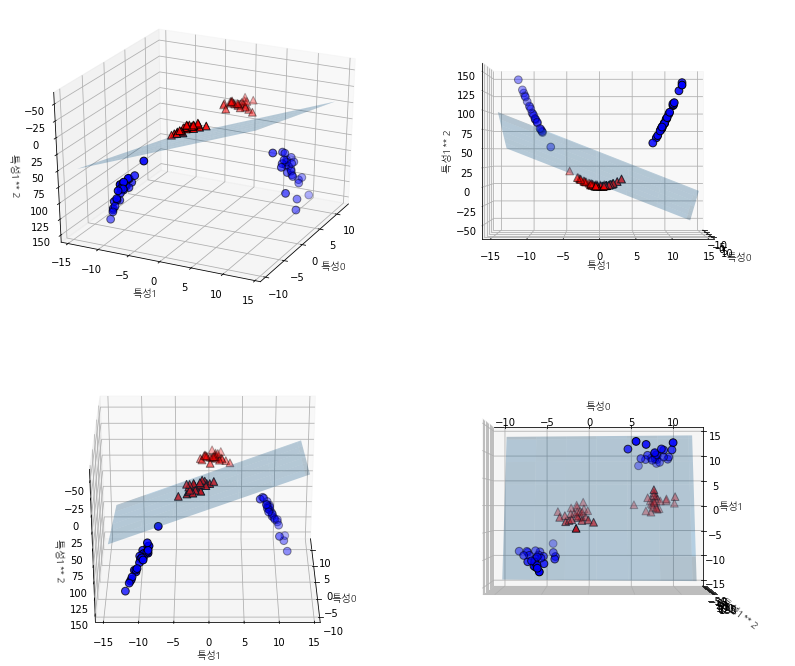

In [84]:
def plot_3d_svm(ax, view_init):
    xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
    yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

    XX, YY = np.meshgrid(xx, yy)
    ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
    ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=.3)
    ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
              cmap=mglearn.cm2, s=60, edgecolor='k')
    ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
              cmap=mglearn.cm2, s=60, edgecolor='k')
    ax.set_xlabel('특성0', fontproperties=fontprop)
    ax.set_ylabel('특성1', fontproperties=fontprop)
    ax.set_zlabel('특성1 ** 2', fontproperties=fontprop)
    ax.view_init(*view_init)
    
linear_svm_3d = LinearSVC(max_iter=20000)
linear_svm_3d.fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# 선형 결정 경계 그리기
plt.figure(figsize=(14, 12))
plt.subplots_adjust(wspace=0)

ax = plt.subplot(2, 2, 1, projection='3d')
plot_3d_svm(ax, (-152, -26))
ax2 = plt.subplot(2, 2, 2, projection='3d')
plot_3d_svm(ax2, (0, 0))
ax3 = plt.subplot(2, 2, 3, projection='3d')
plot_3d_svm(ax3, (-152, 0))
ax4 = plt.subplot(2, 2, 4, projection='3d')
plot_3d_svm(ax4, (450, 450))
plt.show()

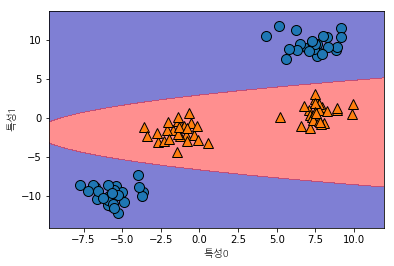

In [85]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
            cmap=mglearn.cm2, alpha=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('특성0', fontproperties=fontprop)
plt.ylabel('특성1', fontproperties=fontprop)
plt.show()

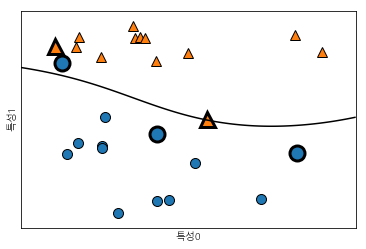

In [86]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=.1)
svm.fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
# 데이터 포인트 그리기
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# 서포트 벡터
sv = svm.support_vectors_
# dual_coef_의 부호에 의해 서포트 벡터의 클래스 레이블이 결정
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel('특성0', fontproperties=fontprop)
plt.ylabel('특성1', fontproperties=fontprop)
plt.show()

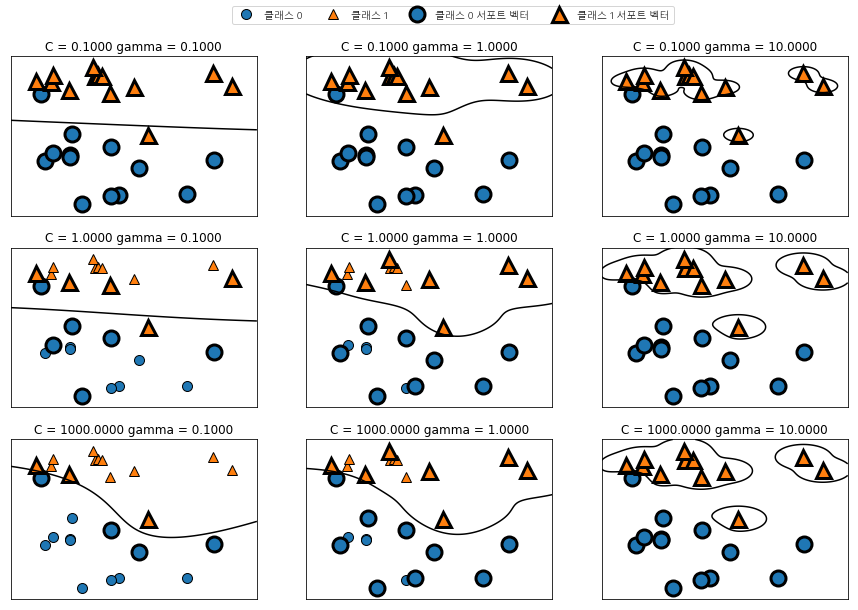

In [95]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0, 0].legend(['클래스 0', '클래스 1', '클래스 0 서포트 벡터',
                   '클래스 1 서포트 벡터'], ncol=4, loc=(.9, 1.2),
                   prop=fontprop)

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)
print('gamma == auto')
print('  훈련 세트 정확도 : {:.3f}'.format(svc.score(X_train, y_train)))
print('테스트 세트 정확도 : {:.3f}'.format(svc.score(X_test, y_test)))

svc = SVC(gamma='scale')
svc.fit(X_train, y_train)
print('\ngamma == scale')
print('  훈련 세트 정확도 : {:.3f}'.format(svc.score(X_train, y_train)))
print('테스트 세트 정확도 : {:.3f}'.format(svc.score(X_test, y_test)))

print('\n\nScale에 따라 정확도의 차이가 확연하게 드러남을 확인할 수 있다.')

gamma == auto
  훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.629

gamma == scale
  훈련 세트 정확도 : 0.946
테스트 세트 정확도 : 0.951


Scale에 따라 정확도의 차이가 확연하게 드러남을 확인할 수 있다.


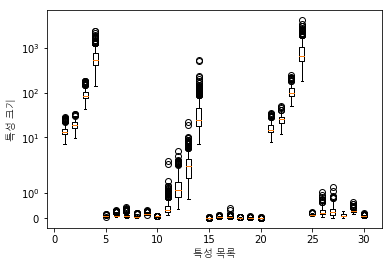

In [97]:
plt.boxplot(X_train, manage_xticks=False)
plt.yscale('symlog')
plt.xlabel('특성 목록', fontproperties=fontprop)
plt.ylabel('특성 크기', fontproperties=fontprop)
plt.show()

In [98]:
# 훈현 세트에서 특성별 최솟값 계산
min_on_training = X_train.min(axis=0)
# 훈련 세트에서 특성별 (최댓값 - 최솟값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis=0)
# 훈련 데이터에 최솟값을 빼고 범위로 나누면
# 각 특성에 대해 최소값은 0, 최댓값은 1입니다.
X_train_scaled = (X_train - min_on_training)/ range_on_training
print('특성별 최솟값\n', X_train_scaled.min(axis=0))
print('특성별 최댓값\n', X_train_scaled.max(axis=0))

특성별 최솟값
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최댓값
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [99]:
X_test_scaled = (X_test - min_on_training)/ range_on_training
svc = SVC(gamma='auto')
svc.fit(X_train_scaled, y_train)
print('  훈련 세트 정확도 : {:.3f}'.format(svc.score(X_train_scaled, y_train)))
print('테스트 세트 정확도 : {:.3f}'.format(svc.score(X_test_scaled, y_test)))

  훈련 세트 정확도 : 0.948
테스트 세트 정확도 : 0.951
